#CSE353 Homework 2
JeongYoon Lee(114133199)

In [78]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import math
drive.mount('/content/drive')
datadir = 'drive/My Drive/CSE353/trainingData/trainingData'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Training

In [80]:
#Training Face image
print("<Training result>")

cv_img_face = [0]
num_of_face = 0

#For mean value
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face)
    # plt.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
    # plt.show()
    length, height, depth = n.shape
    new_vector_face = n.reshape((length * height * depth, 1)) #Xi
    cv_img_face = new_vector_face + cv_img_face
    num_of_face = num_of_face +1

mean_face = cv_img_face/num_of_face
print("Size of mean for face class is : ",np.shape(mean_face))
print("Mean of face class is : ")
print(mean_face)
print()
# num_of_face = 184 (The number of Training dataset for face)

#For Large sigma for face (Covariance)
Sigma_Xi_M_face = [0]
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face)
    length, height, depth = n.shape
    Xi_M_face = n.reshape((length * height * depth, 1)) #Xi
    Xi_M_face = Xi_M_face - mean_face
    Sigma_Xi_M_face = (Xi_M_face * Xi_M_face.T) + Sigma_Xi_M_face
    # print(np.shape(Xi_M.T))

# print(Sigma_Xi_M_face)
# print(np.shape(Sigma_Xi_M_face)) # 900*900
Sigma_face = Sigma_Xi_M_face / num_of_face
Covariance_face = np.diag(Sigma_face)
print("Size of Covariance of face class : ", np.shape(Covariance_face))
print("Covariance of face class")
print(Covariance_face)
print()


# ###############################################################
# # using var method in python
# Sigma_Xi_M_face = np.zeros((900,1))

# for img_face in glob.glob(datadir + "/face/*.jpg"):
#     n= cv2.imread(img_face)
#     length, height, depth = n.shape
#     Xi_M_face = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_face = np.array(Xi_M_face)
#     Sigma_Xi_M_face = np.hstack((Sigma_Xi_M_face, Xi_M_face))
# Sigma_Xi_M_face = np.delete(Sigma_Xi_M_face,1, axis = 1)    
# A = Sigma_Xi_M_face.var(axis = 1)
# Covariance_face = A
# print("Using python method to get Covariance with face class")
# print(A)
# ########################################################


print()
#Training Background image
cv_img_bg = [0]
num_of_bg = 0

#For mean value
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg)
    length, height, depth = n.shape
    new_vector_bg = n.reshape((length * height * depth, 1)) #Xi
    cv_img_bg = new_vector_bg + cv_img_bg
    num_of_bg = num_of_bg +1

mean_bg = cv_img_bg/num_of_bg
print("Size of mean of background class is : ",np.shape(mean_bg))
print("Mean of background class is : ")
print(mean_bg)
# num_of_bg = 249 (The number of Training dataset for face)


#For Large sigma for background (Covariance)
Sigma_Xi_M_bg = [0]
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg)
    length, height, depth = n.shape
    Xi_M_bg = n.reshape((length * height * depth, 1)) #Xi
    Xi_M_bg = Xi_M_bg - mean_bg
    Sigma_Xi_M_bg = (Xi_M_bg * Xi_M_bg.T) + Sigma_Xi_M_bg

# print(Sigma_Xi_M_bg)
# print(np.shape(Sigma_Xi_M_bg)) # 900*900
Sigma_bg = Sigma_Xi_M_bg / num_of_bg
Covariance_bg = np.diag(Sigma_bg)
print("Size of Covariance of background : ", np.shape(Covariance_bg))
print("Covariance of background class")
print(Covariance_bg)
print()



# ###############################################################
# # using var method in python
# Sigma_Xi_M_bg = np.zeros((900,1))

# for img_bg in glob.glob(datadir + "/background/*.jpg"):
#     n= cv2.imread(img_bg)
#     length, height, depth = n.shape
#     Xi_M_bg = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_bg = np.array(Xi_M_bg)
#     Sigma_Xi_M_bg = np.hstack((Sigma_Xi_M_bg, Xi_M_bg))
# Sigma_Xi_M_bg = np.delete(Sigma_Xi_M_bg,1, axis = 1)    
# A = Sigma_Xi_M_bg.var(axis = 1)
# Covariance_bg = A
# print("Using python method to get Covariance with background class")
# print(A)
# ########################################################
  

<Training result>
Size of mean for face class is :  (900, 1)
Mean of face class is : 
[[ 89.9076087 ]
 [110.74456522]
 [127.8423913 ]
 [ 82.97826087]
 [103.51630435]
 [120.53804348]
 [ 70.13586957]
 [ 88.47282609]
 [106.68478261]
 [ 56.02173913]
 [ 73.22826087]
 [ 91.29347826]
 [ 46.50543478]
 [ 61.10326087]
 [ 80.1576087 ]
 [ 41.00543478]
 [ 54.61956522]
 [ 73.11413043]
 [ 38.58695652]
 [ 50.41847826]
 [ 69.2826087 ]
 [ 36.89673913]
 [ 48.64673913]
 [ 66.55434783]
 [ 36.52717391]
 [ 47.88586957]
 [ 65.91847826]
 [ 38.69565217]
 [ 50.92934783]
 [ 68.26086957]
 [ 43.26086957]
 [ 56.16304348]
 [ 74.125     ]
 [ 49.86413043]
 [ 65.03804348]
 [ 82.85326087]
 [ 64.52173913]
 [ 81.32065217]
 [100.08152174]
 [ 78.51086957]
 [ 97.5326087 ]
 [116.24456522]
 [ 82.03804348]
 [101.90217391]
 [121.69021739]
 [ 87.43478261]
 [107.74456522]
 [125.72282609]
 [ 72.27173913]
 [ 92.49456522]
 [110.46195652]
 [ 51.20652174]
 [ 69.63043478]
 [ 88.43478261]
 [ 35.00543478]
 [ 51.52173913]
 [ 70.8423913 ]
 [

#Testing

<Testing Result>
Entire number of face :  232
Number of detected as face, actually face :  191
Number of detected as background, but actually face 41

Entire number of background: 564
Number of detected as background, actually background :  421
Number of detected as face, but actually background :  143

Face classification accuracy :  0.8232758620689655
Background classification accuracy :  0.7464539007092199


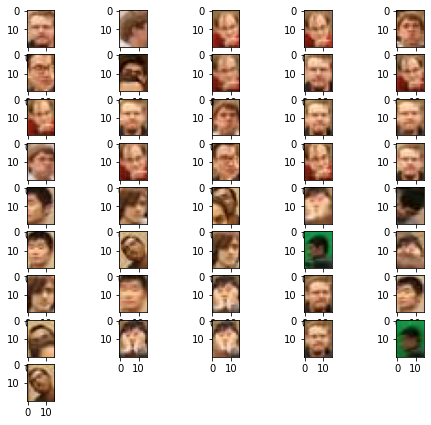

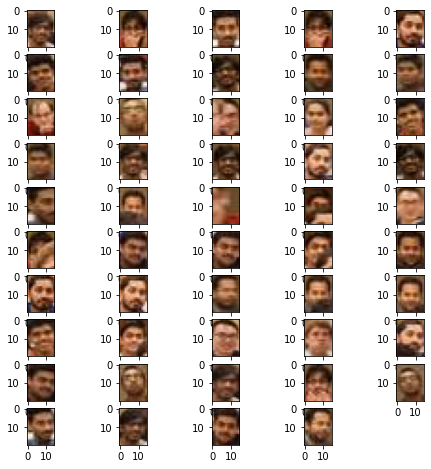

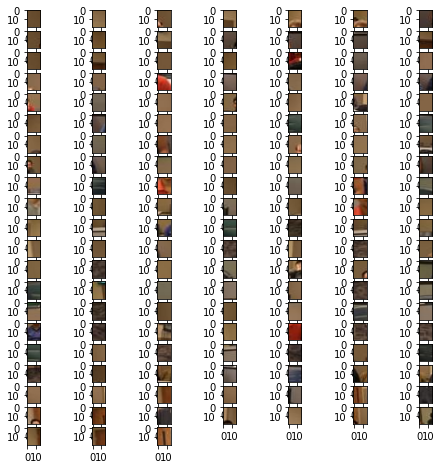

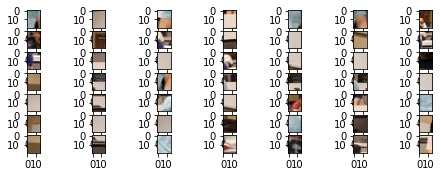

In [81]:
#Testing New image
#mean_face, mean_bg, Covariance_face , Covariance_bg

print("<Testing Result>")
testdatadir = 'drive/My Drive/CSE353/testingData/testingData'


Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_face = 0
num_of_wrong_face = 0
num_face = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 10
cols = 5

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/face/*.jpg"):
    num_face += 1
    n= cv2.imread(img_face_test)
    length, height, depth = n.shape
    new_vector_face_test = n.reshape((length * height * depth, 1)) #Xi
    A_face = ((new_vector_face_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_face_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val < bg_test_val):
      # print("face detected wrong!")
      num_of_wrong_face += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      #print("face detection successfully!")
      num_of_right_face += 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows, cols, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()

#entire number of face testing image       
print("Entire number of face : ",num_face) 
print("Number of detected as face, actually face : ", num_of_right_face)
print("Number of detected as background, but actually face", num_of_wrong_face)
print()
   
    
Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_bg = 0
num_of_wrong_bg = 0
num_bg = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 21
cols = 7

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/background/*.jpg"):
    num_bg += 1
    n= cv2.imread(img_face_test)
    length, height, depth = n.shape
    new_vector_bg_test = n.reshape((length * height * depth, 1)) #Xi

    A_face = ((new_vector_bg_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_bg_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val > bg_test_val):
      # print("background detected wrong!")
      num_of_wrong_bg += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      # print("background detected successfully!")
      num_of_right_bg += 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows, cols, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()      
print("Entire number of background:",num_bg) 
print("Number of detected as background, actually background : ",num_of_right_bg)
print("Number of detected as face, but actually background : ", num_of_wrong_bg)


#var .. using hardcoding to get covariance
#41
#143

#var .. using python method to get covariance
#39
#146

print()
face_accuracy = num_of_right_face /num_face
bg_accuracy = num_of_right_bg / num_bg

print("Face classification accuracy : ", face_accuracy)
print("Background classification accuracy : ", bg_accuracy)


#Trial Grayscale

<Testing Result>
entire num of face :  232
detected as face, actually face :  181
detected as background, but actually face 51

entire num of background: 564
detected as background, actually background :  419
detected as face, but actually background 145

Face accuracy :  0.7801724137931034
Background accuracy :  0.7429078014184397


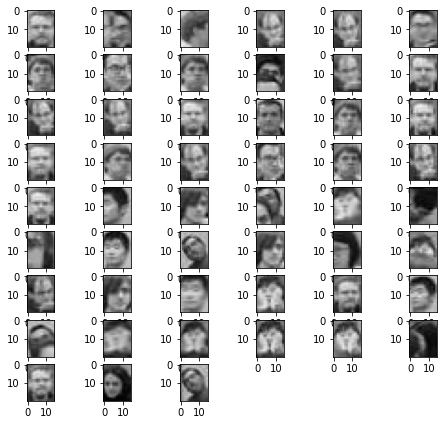

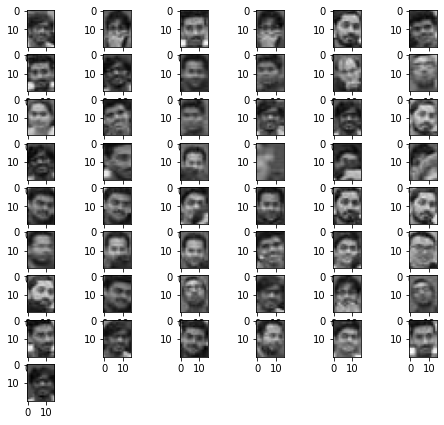

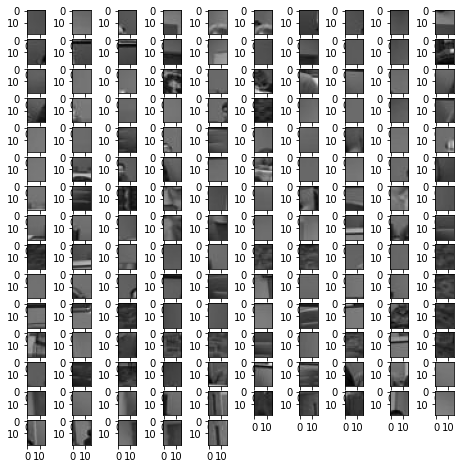

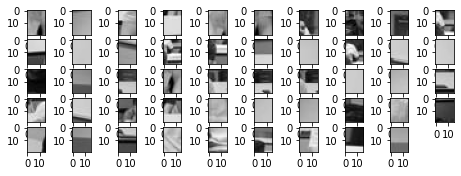

In [82]:
#Training Face image
cv_img_face = [0]
num_of_face = 0

#For mean value
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    new_vector_face = n.reshape((length * height , 1)) #Xi
    cv_img_face = new_vector_face + cv_img_face
    num_of_face = num_of_face +1

mean_face = cv_img_face/num_of_face
# print(mean_face)
# num_of_face = 184 (The number of Training dataset for face)

#For Large sigma for face
Sigma_Xi_M_face = [0]
Xi_M_face = [0]
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    Xi_M_face = n.reshape((length * height , 1)) #Xi
    Xi_M_face = Xi_M_face - mean_face
    Sigma_Xi_M_face = (Xi_M_face * Xi_M_face.T) + Sigma_Xi_M_face

Sigma_face = Sigma_Xi_M_face / num_of_face
Covariance_face = np.diag(Sigma_face)



# ###############################################################3
# # using var method in python
# Sigma_Xi_M_face = np.zeros((900,1))

# for img_face in glob.glob(datadir + "/face/*.jpg"):
#     n= cv2.imread(img_face)
#     length, height, depth = n.shape
#     Xi_M_face = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_face = np.array(Xi_M_face)
#     Sigma_Xi_M_face = np.hstack((Sigma_Xi_M_face, Xi_M_face))
# Sigma_Xi_M_face = np.delete(Sigma_Xi_M_face,1, axis = 1)    
# A = Sigma_Xi_M_face.var(axis = 1)
# Covariance_face = A
# # print(A)



# ########################################################



#Training Background image
cv_img_bg = [0]
num_of_bg = 0

#For mean value
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    new_vector_bg = n.reshape((length * height , 1)) #Xi
    cv_img_bg = new_vector_bg + cv_img_bg
    num_of_bg = num_of_bg +1

mean_bg = cv_img_bg/num_of_bg


#For Large sigma for background
Sigma_Xi_M_bg = [0]
Xi_M_bg=[0]
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    Xi_M_bg = n.reshape((length * height , 1)) #Xi
    Xi_M_bg = Xi_M_bg - mean_bg
    Sigma_Xi_M_bg = (Xi_M_bg * Xi_M_bg.T) + Sigma_Xi_M_bg

Sigma_bg = Sigma_Xi_M_bg / num_of_bg
Covariance_bg = np.diag(Sigma_bg)



# ###############################################################3
# # using var method in python
# Sigma_Xi_M_bg = np.zeros((900,1))

# for img_bg in glob.glob(datadir + "/background/*.jpg"):
#     n= cv2.imread(img_bg)
#     length, height, depth = n.shape
#     Xi_M_bg = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_bg = np.array(Xi_M_bg)
#     Sigma_Xi_M_bg = np.hstack((Sigma_Xi_M_bg, Xi_M_bg))
# Sigma_Xi_M_bg = np.delete(Sigma_Xi_M_bg,1, axis = 1)    
# A = Sigma_Xi_M_bg.var(axis = 1)
# Covariance_bg = A
# # print(A)
# ########################################################

#Testing New image
#mean_face, mean_bg, Covariance_face , Covariance_bg
print("<Testing Result>")
testdatadir = 'drive/My Drive/CSE353/testingData/testingData'


Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_face = 0
num_of_wrong_face = 0
num_face = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 10
cols = 6
num_img = 0

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/face/*.jpg"):
    num_face += 1
    n= cv2.imread(img_face_test, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    new_vector_face_test = n.reshape((length * height , 1)) #Xi
    A_face = ((new_vector_face_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_face_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val < bg_test_val):
      # print("face detected wrong!")
      num_of_wrong_face += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      # print("face detected successfully!")
      num_of_right_face += 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows, cols, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()  
      
#entire number of face testing image       
print("entire num of face : ",num_face) 
print("detected as face, actually face : ", num_of_right_face)
print("detected as background, but actually face", num_of_wrong_face)
print()

   
    
Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_bg = 0
num_of_wrong_bg = 0
num_bg = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 15
cols = 10

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/background/*.jpg"):
    num_bg += 1
    n= cv2.imread(img_face_test, cv2.IMREAD_GRAYSCALE)
    length, height = n.shape
    new_vector_bg_test = n.reshape((length * height , 1)) #Xi

    A_face = ((new_vector_bg_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_bg_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val > bg_test_val):
      # print("background detected wrong!")
      num_of_wrong_bg += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      # print("background detected successfully!")
      num_of_right_bg+= 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows, cols, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()  
      
print("entire num of background:",num_bg) 
print("detected as background, actually background : ",num_of_right_bg)
print("detected as face, but actually background", num_of_wrong_bg)


print()
face_accuracy = num_of_right_face /num_face
bg_accuracy = num_of_right_bg / num_bg

print("Face accuracy : ", face_accuracy)
print("Background accuracy : ", bg_accuracy)

  

#Trial HSV

<Testing Result>
Entire number of face :  232
Number of detected as face, actually face :  220
Number of detected as background, but actually face 12

Entire number of background: 564
Number of detected as background, actually background :  463
Number of detected as face, but actually background :  101

Face accuracy :  0.9482758620689655
Background accuracy :  0.8209219858156028


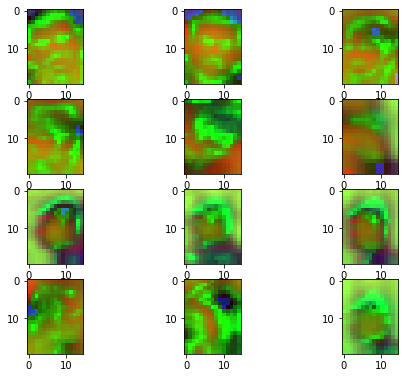

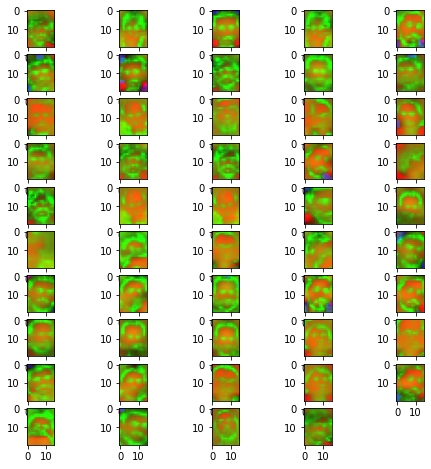

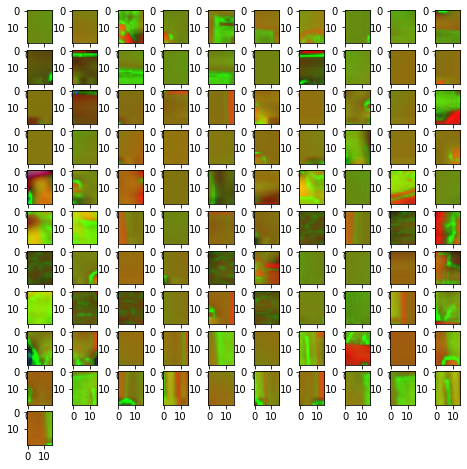

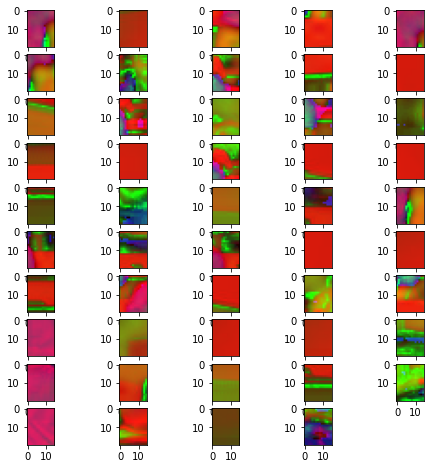

In [83]:
#Training Face image
cv_img_face = [0]
num_of_face = 0

#For mean value
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    # plt.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
    # plt.show()
    length, height, depth = n.shape
    new_vector_face = n.reshape((length * height * depth, 1)) #Xi
    cv_img_face = new_vector_face + cv_img_face
    num_of_face = num_of_face +1

mean_face = cv_img_face/num_of_face
# print(mean_face)
# num_of_face = 184 (The number of Training dataset for face)

#For Large sigma for face
Sigma_Xi_M_face = [0]
for img_face in glob.glob(datadir + "/face/*.jpg"):
    n= cv2.imread(img_face)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    length, height, depth = n.shape
    Xi_M_face = n.reshape((length * height * depth, 1)) #Xi
    Xi_M_face = Xi_M_face - mean_face
    Sigma_Xi_M_face = (Xi_M_face * Xi_M_face.T) + Sigma_Xi_M_face
    # print(np.shape(Xi_M.T))

# print(Sigma_Xi_M_face)
# print(np.shape(Sigma_Xi_M_face)) # 900*900
Sigma_face = Sigma_Xi_M_face / num_of_face
Covariance_face = np.diag(Sigma_face)
# print(Covariance_face)


# ###############################################################3
# # using var method in python
# Sigma_Xi_M_face = np.zeros((900,1))

# for img_face in glob.glob(datadir + "/face/*.jpg"):
#     n= cv2.imread(img_face)
#     length, height, depth = n.shape
#     Xi_M_face = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_face = np.array(Xi_M_face)
#     Sigma_Xi_M_face = np.hstack((Sigma_Xi_M_face, Xi_M_face))
# Sigma_Xi_M_face = np.delete(Sigma_Xi_M_face,1, axis = 1)    
# A = Sigma_Xi_M_face.var(axis = 1)
# Covariance_face = A
# # print(A)



# ########################################################



#Training Background image
cv_img_bg = [0]
num_of_bg = 0

#For mean value
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    length, height, depth = n.shape
    new_vector_bg = n.reshape((length * height * depth, 1)) #Xi
    cv_img_bg = new_vector_bg + cv_img_bg
    num_of_bg = num_of_bg +1

mean_bg = cv_img_bg/num_of_bg
# print(mean_bg)
# num_of_bg = 249 (The number of Training dataset for face)


#For Large sigma for background
Sigma_Xi_M_bg = [0]
for img_bg in glob.glob(datadir + "/background/*.jpg"):
    n= cv2.imread(img_bg)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    length, height, depth = n.shape
    Xi_M_bg = n.reshape((length * height * depth, 1)) #Xi
    Xi_M_bg = Xi_M_bg - mean_bg
    Sigma_Xi_M_bg = (Xi_M_bg * Xi_M_bg.T) + Sigma_Xi_M_bg

# print(Sigma_Xi_M_bg)
# print(np.shape(Sigma_Xi_M_bg)) # 900*900
Sigma_bg = Sigma_Xi_M_bg / num_of_bg
Covariance_bg = np.diag(Sigma_bg)
# print(Covariance_bg)



# ###############################################################3
# # using var method in python
# Sigma_Xi_M_bg = np.zeros((900,1))

# for img_bg in glob.glob(datadir + "/background/*.jpg"):
#     n= cv2.imread(img_bg)
#     length, height, depth = n.shape
#     Xi_M_bg = n.reshape((length * height * depth, 1)) #Xi
#     Xi_M_bg = np.array(Xi_M_bg)
#     Sigma_Xi_M_bg = np.hstack((Sigma_Xi_M_bg, Xi_M_bg))
# Sigma_Xi_M_bg = np.delete(Sigma_Xi_M_bg,1, axis = 1)    
# A = Sigma_Xi_M_bg.var(axis = 1)
# Covariance_bg = A
# # print(A)



# ########################################################


#Testing New image
#mean_face, mean_bg, Covariance_face , Covariance_bg
print("<Testing Result>")
testdatadir = 'drive/My Drive/CSE353/testingData/testingData'


Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_face = 0
num_of_wrong_face = 0
num_face = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 5
cols = 3

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/face/*.jpg"):
    num_face += 1
    n= cv2.imread(img_face_test)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    length, height, depth = n.shape
    new_vector_face_test = n.reshape((length * height * depth, 1)) #Xi
    A_face = ((new_vector_face_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_face_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val < bg_test_val):
      # print("face detected wrong!")
      num_of_wrong_face += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      #print("face detection successfully!")
      num_of_right_face += 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows_correct, cols_correct, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()  
#entire number of face testing image       
print("Entire number of face : ",num_face) 
print("Number of detected as face, actually face : ", num_of_right_face)
print("Number of detected as background, but actually face", num_of_wrong_face)
print()
   
    
Covariance_face_test = np.expand_dims(Covariance_face, axis=1)
Covariance_bg_test = np.expand_dims(Covariance_bg, axis=1)

num_of_right_bg = 0
num_of_wrong_bg = 0
num_bg = 0

#for printing wrong images
i = 1
fig = plt.figure(figsize = (8,8)) 
rows = 11
cols = 10

#for printing correct images
i_correct = 1
fig_correct = plt.figure(figsize = (8,8)) 
rows_correct = 10
cols_correct = 5

# Pr(x*│y=1), Pr(x*│y=0)
for img_face_test in glob.glob(testdatadir + "/background/*.jpg"):
    num_bg += 1
    n= cv2.imread(img_face_test)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2HSV)
    length, height, depth = n.shape
    new_vector_bg_test = n.reshape((length * height * depth, 1)) #Xi

    A_face = ((new_vector_bg_test-mean_face) **2)/(2*Covariance_face_test)
    A_face = A_face.sum()
    B_face = np.log(Covariance_face_test)
    B_face = B_face.sum()
    face_test_val = (-0.5)*B_face -A_face

    A_bg = ((new_vector_bg_test-mean_bg) **2)/(2*Covariance_bg_test)
    A_bg = A_bg.sum()
    B_bg = np.log(Covariance_bg_test)
    B_bg = B_bg.sum()
    bg_test_val = (-0.5)*B_bg -A_bg

    if(face_test_val > bg_test_val):
      # print("background detected wrong!")
      num_of_wrong_bg += 1
      ax = fig.add_subplot(rows, cols, i)
      ax.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
      i = i+ 1
    else:
      # print("background detected successfully!")
      num_of_right_bg += 1
      if(i_correct <50):
        ax_correct = fig_correct.add_subplot(rows_correct, cols_correct, i_correct)
        ax_correct.imshow(cv2.cvtColor(n, cv2.COLOR_BGR2RGB));
        i_correct += 1
fig.show()
fig_correct.show()  

print("Entire number of background:",num_bg) 
print("Number of detected as background, actually background : ",num_of_right_bg)
print("Number of detected as face, but actually background : ", num_of_wrong_bg)


print()
face_accuracy = num_of_right_face /num_face
bg_accuracy = num_of_right_bg / num_bg

print("Face accuracy : ", face_accuracy)
print("Background accuracy : ", bg_accuracy)


